In [20]:
%load_ext autoreload
%autoreload 2
import pyvisa
import time
from PyTLPMX import TLPMX
import numpy as np
import numpy.matlib
import clr
from matplotlib import pyplot as plt
from datetime import datetime
from timeit import default_timer as timer
from scipy.optimize import curve_fit

clr.AddReference("C:\\Program Files\\Thorlabs\\Kinesis\\Thorlabs.MotionControl.DeviceManagerCLI.dll")
clr.AddReference("C:\\Program Files\\Thorlabs\\Kinesis\\Thorlabs.MotionControl.GenericPiezoCLI.dll")
clr.AddReference("C:\\Program Files\\Thorlabs\\Kinesis\\Thorlabs.MotionControl.GenericMotorCLI.dll")
clr.AddReference("C:\\Program Files\\Thorlabs\\Kinesis\\Thorlabs.MotionControl.KCube.PositionAlignerCLI.dll")
clr.AddReference("C:\\Program Files\\Thorlabs\\Kinesis\\Thorlabs.MotionControl.KCube.PiezoCLI.dll")

# Import CLIs
from Thorlabs.MotionControl.DeviceManagerCLI import *
from Thorlabs.MotionControl.GenericMotorCLI import *
from Thorlabs.MotionControl.KCube.PositionAlignerCLI import *
from Thorlabs.MotionControl.KCube.PiezoCLI import *
from Thorlabs.MotionControl.GenericPiezoCLI.Piezo import *
from System import Decimal 
from pyximc import *
from HardwareControl import *
from ConnectHardware import *
from Analytics import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# connect to lock-in amps
rm = pyvisa.ResourceManager()
amp1 = rm.open_resource('GPIB0::8::INSTR')
amp2 = rm.open_resource('GPIB0::9::INSTR')
print(rm.list_resources())

('ASRL3::INSTR', 'ASRL4::INSTR', 'GPIB0::8::INSTR', 'GPIB0::9::INSTR')


In [3]:
motor_id = ConnectMotor("4")

Device with URI xi-com:\\.\COM4 successfully opened

Get device info
Result: 0

Get status
Result: 0


In [ ]:
signal_1, signal_2, timestamps = recordSignals(amp1, amp2, 82)

In [40]:
signal1_norm = normZScore(signal_1)
signal2_norm = normZScore(signal_2)

In [37]:
signal1_norm = normalizeData(signal_1)
signal2_norm = normalizeData(signal_2)

In [ ]:
fig, ax = plt.subplots()
ax.plot(timestamps,signal1_norm, "b-")
ax.plot(timestamps,signal2_norm, "r-")
ax.plot(timestamps,np.subtract(signal1_norm,signal2_norm), "g-")
ax.grid()
#ax.set_ylim([0, np.max(signal_1)*1.1])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Signal (uW)")
plt.legend(["TE", "TM"])
plt.show()

In [ ]:
positions

In [ ]:

def sliding_window_correlation(x, y, window_size, step_size=1):
    """
    Calculate the correlation between two signals over time using a sliding window.
    
    Parameters:
    x (array): First signal.
    y (array): Second signal.
    window_size (int): Size of the sliding window.
    step_size (int): Step size for sliding window. Default is 1.
    
    Returns:
    correlations (list): List of correlation coefficients.
    window_positions (list): List of window starting positions.
    """
    if len(x) != len(y):
        raise ValueError("Signals x and y must have the same length")
    
    n = len(x)
    correlations = []
    window_positions = []

    for start in range(0, n - window_size + 1, step_size):
        end = start + window_size
        x_window = x[start:end]
        y_window = y[start:end]
        if np.std(x_window) == 0 or np.std(y_window) == 0:
            corr = 0
        else:
            corr = np.corrcoef(x_window, y_window)[0, 1]
        correlations.append(corr)
        window_positions.append(start)

    return correlations, window_positions

# Example signals
x = signal_1
y = signal_2

# Parameters
window_size = 25
step_size = 1

# Calculate sliding window correlation
correlations, positions = sliding_window_correlation(x, y, window_size, step_size)

# Plotting the correlation over time
plt.figure(figsize=(10, 6))
plt.plot(positions, correlations, marker='.', linestyle='-', color='b')
plt.title('Sliding Window Correlation Over Time')
plt.xlabel('Window Start Position')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()


In [18]:
rotateToPosition(motor_id, 88)

Position: 88.0 degrees 


In [228]:
rotate(motor_id, 0.1)


Moving by -0.1 degrees
Position: 87.39996337890625 degrees 


In [136]:
data=[]

In [13]:
angles_bin = []
signal_bin = []
angles_all = []
signal_all = []

In [ ]:
for i in range(10):
    TE_signal, TE_err, TM_signal, TM_err = AmpAngleScan(amp1, amp2, motor_id, angles, pm_range)
    data.append(TM_signal)



In [ ]:
# set parameters
start=44.5
end=45.5
step=0.1
pwr_total = 0.320
angles = np.arange(start, end+step, step)
#angles = np.array([43, 45])
pm_range = 605
    
TE_signal, TE_err, TM_signal, TM_err = AmpAngleScan(amp1, amp2, motor_id, angles, pm_range)

#data.append(TM_signal)

# merge data with previous scans
angles_bin.append(angles)
signal_bin.append(TM_signal)
angles_all = np.concatenate(angles_bin)
signal_all = np.concatenate(signal_bin) 

In [7]:
loss = np.max(TM_signal)-np.min(TM_signal)
loss_p = loss/np.max(TM_signal)
print("min/max = {}".format(1-loss_p))

min/max = 0.3087281898200217


In [38]:
angles_bin_w=[]
signal_bin_w=[]
angles_all_w = []
signal_all_w = []

In [16]:
start=84
end=89
step=1
angles_w = np.arange(start, end+step, step)
pm_range=0
TE_w, TEw_err, TM_w, TMw_err = AmpAngleScanStep(amp1, amp2, motor_id, angles_w, pm_range)
#angles_bin_w.append(angles_w)
#signal_bin_w.append(TM_w)
#angles_all_w = np.concatenate(angles_bin_w)
#signal_all_w = np.concatenate(signal_bin_w) 


Starting measurements, estimated completion time 0.95 minutes
Position: 84.0 degrees 


Press enter once power meter is positioned...
 



Taking power measurement
Position: 85.0 degrees 


Press enter once power meter is positioned...
 



Taking power measurement
Position: 86.0 degrees 


Press enter once power meter is positioned...
 



Taking power measurement
Position: 87.0 degrees 


Press enter once power meter is positioned...
 



Taking power measurement
Position: 88.0 degrees 


Press enter once power meter is positioned...
 



Taking power measurement
Position: 89.0 degrees 


Press enter once power meter is positioned...
 



Taking power measurement
Scan finished



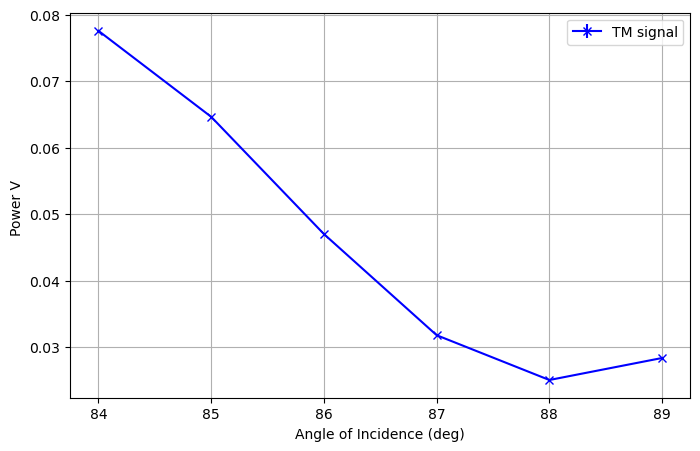

In [17]:
# PLOT RESULTS
fig, ax = plt.subplots(figsize=(8,5))
# calculate error and plot graph

# WATER
ax.errorbar(angles_w, TM_w, TMw_err, fmt='x-', color="blue")
#ax.errorbar(angles_w, TE_w, TEw_err, fmt='x-', color="blue")

# AIR
#ax.errorbar(angles, TM_signal, TM_err, fmt='x-', color="red")
#ax.errorbar(angles, TE_signal, TE_err, fmt='x-', color="blue")

# LONG SCAN WATER
#ax.plot(angles_all_w, signal_all_w, 'b*-')

# LONG SCAN AIR
#ax.plot(angles_all, signal_all, 'r*-')

#loss = np.max(TM_signal)-np.min(TM_signal)
#loss_p = loss/np.max(TM_signal)
#print("min/max = {}".format(1-loss_p))

# Set labels
ax.set_xlabel('Angle of Incidence (deg)')
ax.set_ylabel('Power V ')
#ax.set_ylabel('Reflectance %')
ax.grid()
plt.legend(["TM signal"])#, "TE signal air"])
#ax.set_ylim([0.61, 0.69])
plt.show()

# get minimum power value, find resonance angle
#min_power_idx = np.argmin(TM_signal)
#res_angle = angles[min_power_idx]

#print("Resonance angle estimate: {}".format(round(res_angle, 4)))

In [14]:
# save figure
now = datetime.now()
current_time = now.strftime("%H;%M")
file_prefix = "{}-".format("SPR Angle m-hexanol-12hrs scan TM") + current_time

figName = file_prefix + ".png"
    
# Save fig to png in figs folder
os.chdir("Figs")
fig.savefig(figName)
os.chdir("..")
print("Saved")

Saved


In [15]:
 # Save data to CSV in csv folder
 os.chdir("CSVs")
 csvFileName = file_prefix + ".csv"
 with open(csvFileName, "w") as txt_file:   
     for i in range(len(angles_w)):
	        txt_file.write("{}".format(angles_w[i]) + "," + "{:e}".format(TM_w[i]) + "\n")
    
 # Return to main folder
 os.chdir("..")
print("Saved")

Saved


In [12]:
signal_1, signal_2, timestamps = recordSignals(amp1, amp2, 30)


Starting 30 seccond measurement....
Done


Signal 1 SD: 0.10107259177728353
Signal 2 SD: 0.040472176434586685


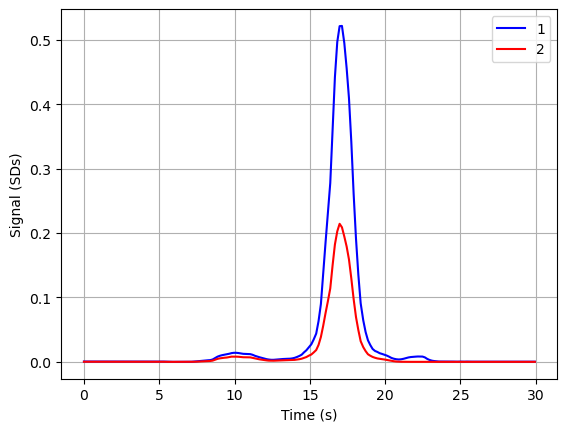

In [13]:
fig, ax = plt.subplots()
print("Signal 1 SD: {}".format(np.std(signal_1)))
print("Signal 2 SD: {}".format(np.std(signal_2)))

ax.plot(timestamps,signal_1, "b-")
ax.plot(timestamps,signal_2, "r-")
ax.grid()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Signal (SDs)")
plt.legend(["1", "2"])
plt.show()

In [ ]:
data.pop()

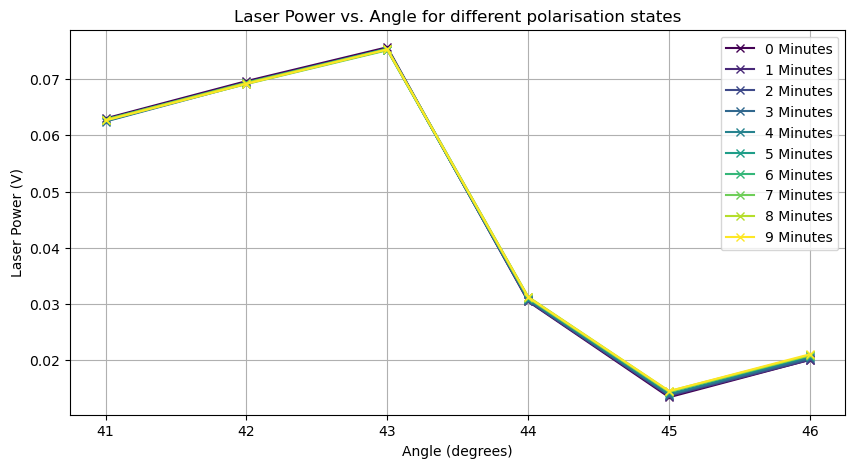

In [138]:
# PLOTTING MULTIPLE SCANS ON ONE GRAPH

# Colors for the plots
fig, ax = plt.subplots(figsize=(10,5))
num_datasets = 10
colors = plt.cm.viridis(np.linspace(0, 1, num_datasets))
dips=[]
# Create the plot
#plt.figure(figsize=(10, 6))

# Iteratively plot each dataset
for i in range(num_datasets):
    plt.plot(angles, data[i], 'x-', color=colors[i % len(colors)], label=f'{i} Minutes')
    dip = np.max(data[i])-np.min(data[i])
    dips.append(dip)

# Adding labels and title
ax.set_xlabel('Angle (degrees)')
ax.set_ylabel('Laser Power (V)')
ax.set_title('Laser Power vs. Angle for different polarisation states')
ax.legend()
ax.grid(True)


# Display the plot
plt.show()


In [22]:
print("Disconnecting devices...")
rm.close()
lib.close_device(byref(c_int(motor_id)))
print('End program')

Disconnecting devices...
End program


In [19]:
lib.close_device(byref(c_int(motor_id)))

0

In [61]:
meter = ConnectPM()

-1073807343
b'Insufficient location information or the device or resource is not present in the system.'
No Device Found!


In [51]:

start = 41
end = 45
step = 0.5
mPeriod = 1

In [50]:
polar_angles = [0,5,10,15,20,25,30,35,40,45]
total_p = [0.34,0.44,0.54,0.61,0.64, 0.64,0.59,0.51,0.42,0.26]
p_reflected = [0.04,0.052,0.063,0.07,0.075,0.074,0.069,0.061,0.048,0.035]
reflectance = np.divide(p_reflected, total_p)

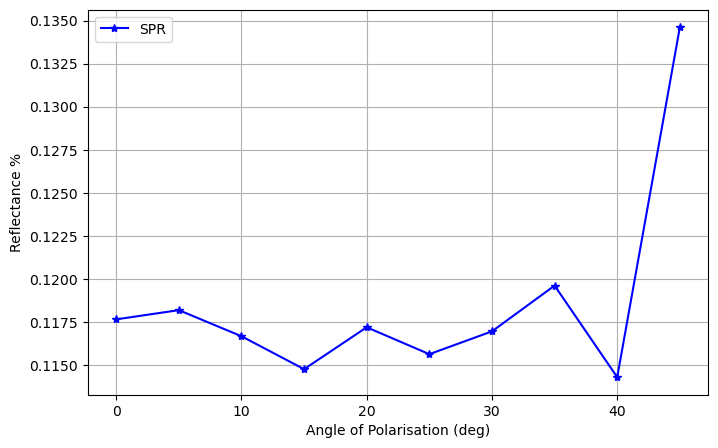

In [51]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(polar_angles, reflectance, 'b*-')

ax.set_xlabel('Angle of Polarisation (deg)')
ax.set_ylabel('Reflectance %')
ax.set_ylabel('Reflectance %')
ax.grid()
plt.legend(["SPR"])#, "TE signal air"])
#ax.set_ylim([0, 100])
plt.show()